In [ ]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import shutil 
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
#from tensorflow.keras.layers import Dense, Flatten

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/Train'
test_path = '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/Test'
valid_path = '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/Validate'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/Train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 753 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 231 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(  
  training_set,
  validation_data=test_set,
  epochs=10
 # steps_per_epoch=len(training_set),
  #validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
24/24 [==============================] - 501s 21s/step - loss: 0.1816 - accuracy: 0.9482 - val_loss: 0.9596 - val_accuracy: 0.6450
Epoch 2/10
24/24 [==============================] - 498s 21s/step - loss: 0.1727 - accuracy: 0.9509 - val_loss: 1.0220 - val_accuracy: 0.6537
Epoch 3/10
24/24 [==============================] - 501s 21s/step - loss: 0.1274 - accuracy: 0.9602 - val_loss: 1.0318 - val_accuracy: 0.6407
Epoch 4/10
24/24 [==============================] - 500s 21s/step - loss: 0.1200 - accuracy: 0.9681 - val_loss: 0.9281 - val_accuracy: 0.6667
Epoch 5/10
24/24 [==============================] - 499s 21s/step - loss: 0.0934 - accuracy: 0.9748 - val_loss: 1.0887 - val_accuracy: 0.6537
Epoch 6/10
24/24 [==============================] - 500s 21s/step - loss: 0.0944 - accuracy: 0.9774 - val_loss: 1.0379 - val_accuracy: 0.7229
Epoch 7/10
24/24 [==============================] - 499s 21s/step - loss: 0.0908 - accuracy: 0.9748 - val_loss: 1.0293 - val_accuracy: 0.7532
Epoch 

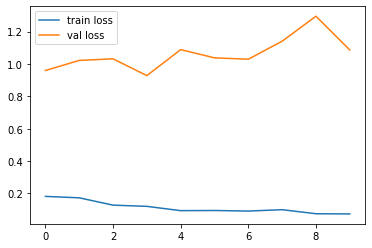

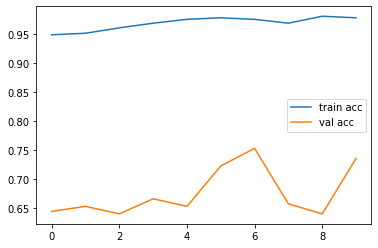

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [ ]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [ ]:
def createModel():
    model1 = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=IMAGE_SIZE + [3]))
    model1.add(Conv2D(32, (3, 3), activation='relu'))
    model1.add(MaxPooling2D(pool_size=(2, 2)))
    model1.add(Dropout(0.25))

    model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model1.add(Conv2D(64, (3, 3), activation='relu'))
    model1.add(MaxPooling2D(pool_size=(2, 2)))
    model1.add(Dropout(0.25))

    model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model1.add(Conv2D(64, (3, 3), activation='relu'))
    model1.add(MaxPooling2D(pool_size=(2, 2)))
    model1.add(Dropout(0.25))

    model1.add(Flatten())
    model1.add(Dense(512, activation='relu'))
    model1.add(Dropout(0.5))
    model1.add(Dense(3, activation='softmax'))
    
    return model1

In [ ]:
model2 = createModel()
batch_size = 256
epochs = 50
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0

In [ ]:
r1 = model2.fit(training_set,validation_data=test_set,epochs=20)

Epoch 1/20
24/24 [==============================] - 268s 11s/step - loss: 1.2934 - accuracy: 0.4542 - val_loss: 0.9910 - val_accuracy: 0.5238
Epoch 2/20
24/24 [==============================] - 223s 9s/step - loss: 0.9795 - accuracy: 0.5166 - val_loss: 1.0049 - val_accuracy: 0.4372
Epoch 3/20
24/24 [==============================] - 227s 9s/step - loss: 0.9033 - accuracy: 0.5684 - val_loss: 0.9696 - val_accuracy: 0.4286
Epoch 4/20
24/24 [==============================] - 232s 10s/step - loss: 0.8648 - accuracy: 0.6122 - val_loss: 0.9480 - val_accuracy: 0.5238
Epoch 5/20
24/24 [==============================] - 223s 9s/step - loss: 0.8441 - accuracy: 0.6361 - val_loss: 0.9401 - val_accuracy: 0.6190
Epoch 6/20
24/24 [==============================] - 227s 9s/step - loss: 0.7458 - accuracy: 0.6879 - val_loss: 0.9850 - val_accuracy: 0.5931
Epoch 7/20
24/24 [==============================] - 225s 9s/step - loss: 0.7458 - accuracy: 0.6999 - val_loss: 1.0086 - val_accuracy: 0.4935
Epoch 8/20


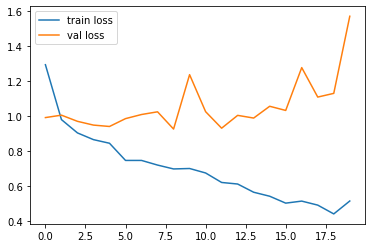

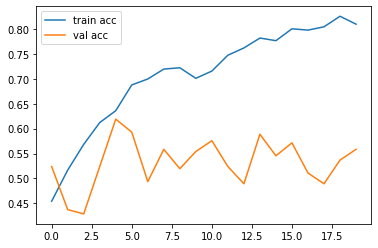

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow import keras

In [ ]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=IMAGE_SIZE + [3], padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(3, activation='softmax') #Output layer
])

In [ ]:
lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 6)       456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 112, 112, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 108, 16)      2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 54, 54, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 46656)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               5598840   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [ ]:
lenet_5_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))
r2 = lenet_5_model.fit(training_set,validation_data=test_set,epochs=30)

Epoch 1/30
24/24 [==============================] - 707s 30s/step - loss: 1.3567 - accuracy: 0.4887 - val_loss: 0.9831 - val_accuracy: 0.4329
Epoch 2/30
24/24 [==============================] - 47s 2s/step - loss: 0.8627 - accuracy: 0.6016 - val_loss: 0.9590 - val_accuracy: 0.4978
Epoch 3/30
24/24 [==============================] - 46s 2s/step - loss: 0.7953 - accuracy: 0.6799 - val_loss: 1.0627 - val_accuracy: 0.4372
Epoch 4/30
24/24 [==============================] - 46s 2s/step - loss: 0.8216 - accuracy: 0.6109 - val_loss: 1.0024 - val_accuracy: 0.3896
Epoch 5/30
24/24 [==============================] - 46s 2s/step - loss: 0.8059 - accuracy: 0.6560 - val_loss: 1.0191 - val_accuracy: 0.4372
Epoch 6/30
24/24 [==============================] - 46s 2s/step - loss: 0.8594 - accuracy: 0.6056 - val_loss: 0.9397 - val_accuracy: 0.5628
Epoch 7/30
24/24 [==============================] - 45s 2s/step - loss: 0.8304 - accuracy: 0.6348 - val_loss: 1.0081 - val_accuracy: 0.5238
Epoch 8/30
24/24 [

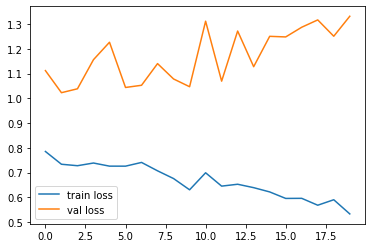

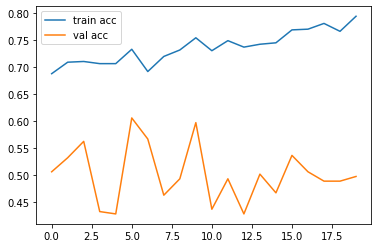

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r2.history['loss'], label='train loss')
plt.plot(r2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r2.history['accuracy'], label='train acc')
plt.plot(r2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
alexnet = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=IMAGE_SIZE + [3]),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

In [ ]:
alexnet.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization_15 (Batc (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 26, 26, 256)       614656    
_________________________________________________________________
batch_normalization_16 (Batc (None, 26, 26, 256)       1024      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 384)      

In [ ]:
import tensorflow as tf

In [ ]:
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
r3 = alexnet.fit(training_set,validation_data=test_set,epochs=30)

Epoch 1/30
24/24 [==============================] - 126s 5s/step - loss: 0.9161 - accuracy: 0.6375 - val_loss: 32.7493 - val_accuracy: 0.5238
Epoch 2/30
24/24 [==============================] - 125s 5s/step - loss: 0.9632 - accuracy: 0.6534 - val_loss: 19.2190 - val_accuracy: 0.5238
Epoch 3/30
24/24 [==============================] - 127s 5s/step - loss: 0.8868 - accuracy: 0.6428 - val_loss: 2.3734 - val_accuracy: 0.5671
Epoch 4/30
24/24 [==============================] - 126s 5s/step - loss: 0.8989 - accuracy: 0.6308 - val_loss: 1.1107 - val_accuracy: 0.5455
Epoch 5/30
24/24 [==============================] - 126s 5s/step - loss: 0.6825 - accuracy: 0.7105 - val_loss: 6.0596 - val_accuracy: 0.5238
Epoch 6/30
24/24 [==============================] - 127s 5s/step - loss: 0.8223 - accuracy: 0.6946 - val_loss: 88.7044 - val_accuracy: 0.5238
Epoch 7/30
24/24 [==============================] - 127s 5s/step - loss: 0.8372 - accuracy: 0.6773 - val_loss: 6.1449 - val_accuracy: 0.5238
Epoch 8/30

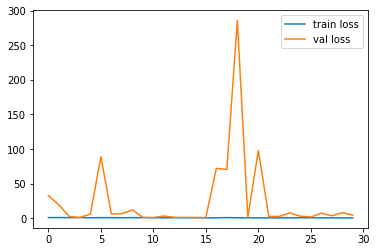

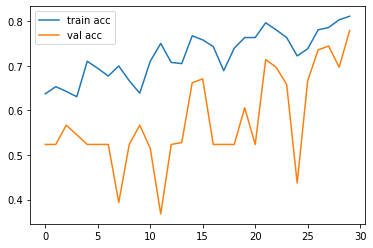

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r3.history['loss'], label='train loss')
plt.plot(r3.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r3.history['accuracy'], label='train acc')
plt.plot(r3.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
#Vgg

In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30
 # steps_per_epoch=len(training_set),
  #validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
 5/24 [=====>........................] - ETA: 4:03 - loss: 0.0266 - accuracy: 0.9931

KeyboardInterrupt: ignored